In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# %matplotlib widget


# SIR Model

A simple mathematical description of the spread of a disease in a population is the so-called SIR model, which divides the (fixed) population of N individuals into three "compartments" which may vary as a function of time, t:

S(t): are those susceptible but not yet infected with the disease (All - Confirmed).

I(t): is the number of infectious individuals (Confirmed - Recovered - Deaths).

R(t): are those individuals who have recovered from the disease and now have immunity to it (Recovered + Deaths [Maybe]).

\begin{align*}
{\dot S}(t) = \frac{\mathrm{d}S}{\mathrm{d}t} &= -\frac{\beta S I}{N},\\
{\dot I}(t) = \frac{\mathrm{d}I}{\mathrm{d}t} &= \frac{\beta S I}{N} - \gamma I,\\
{\dot R}(t) = \frac{\mathrm{d}R}{\mathrm{d}t} &= \gamma I.
\end{align*}

The SIR model describes the change in the population of each of these compartments in terms of two parameters, $\beta $ and $\gamma $.  $\beta $ describes the effective contact rate of the disease: an infected individual comes into contact with  $\beta N$ other individuals per unit time (of which the fraction that are susceptible to contracting the disease is $S/N$). $\gamma $ is the mean recovery rate: that is, $1/\gamma$ is the mean period of time during which an infected individual can pass it on.

https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

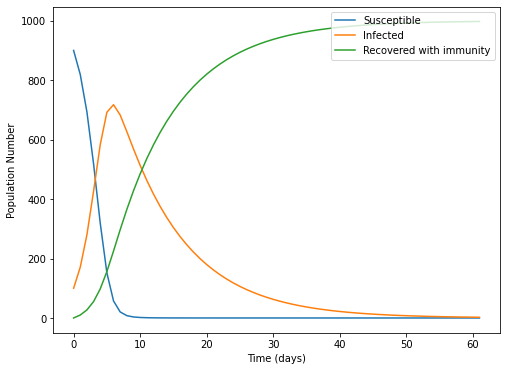

In [3]:
# Total population, N.
N = 1000
max_days = 60
beta0 = .9
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 100, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Initial conditions vector
S, I, R = [S0], [I0], [R0]
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
   

gamma = 1./10 
# A grid of time points (in days)
time = np.linspace(0, max_days, max_days+1)

#### varying beta
beta_changepoints = [(10, 0.7),
                     (16, lambda x: np.maximum(0.5 - 0.02*(x-x[0]), 0.2)),
                     (40, lambda x: np.minimum(0.5 + 0.02*(x-x[0]), beta0)) ] 

beta_changepoints = None 

beta = np.full((max_days+1,), beta0)
if beta_changepoints is not None:
    for _cp in beta_changepoints:
        if isinstance(_cp[1], float):
            beta[_cp[0]:] = _cp[1]*beta[_cp[0]-1]
        elif isinstance(_cp[1], object):
            beta[_cp[0]:] = _cp[1](time[_cp[0]:])
        
###################

# Simulation of differential equaiton using Numerical differentiation
# dx/dt = (x[t] - x[t-1])/dt
# E.g. S[t] = S[t-1] + dt *(B*S*I/N)  dt = 1 # In our simulation dt is 1-day
for idx, t in enumerate(time):
    term1 = (beta[idx]/N) * S[-1] * I[-1]
    term2 = gamma * I[-1]
    S.append(S[-1] - term1)
    I.append(I[-1] + term1 - term2)
    R.append(R[-1] + term2)

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(S, label='Susceptible');
ax.plot(I, label='Infected');
ax.plot(R, label='Recovered with immunity');
ax.set_xlabel('Time (days)');
ax.set_ylabel('Population Number');
ax.legend(loc='upper right');


# Get Real Data